Exercise 3

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: list
    final_result: str

In [3]:
def first_node(state: AgentState) -> AgentState:
    state["final_result"] = f"{state['name']}, welcome to the system!"
    return state


def second_node(state: AgentState) -> AgentState:
    state["final_result"] = state["final_result"] + f", you are {state['age']} years old."
    return state

def third_node(state: AgentState) -> AgentState:
    state["final_result"] = state["final_result"] + f" You have skills in: {', '.join(state['skills'])}"
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("personalize", first_node)
graph.add_node("age_description", second_node)
graph.add_node("skills_description", third_node)

graph.set_entry_point("personalize")
graph.add_edge("personalize", "age_description")
graph.add_edge("age_description", "skills_description")
graph.set_finish_point("skills_description")

app = graph.compile()

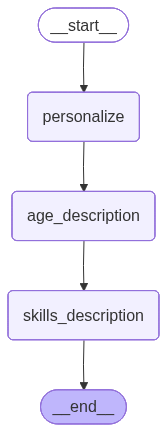

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"name": "Linda", "age": 31, "skills": ["Python", "Machine Learning", "LangGraph"]})

In [7]:
result["final_result"]

'Linda, welcome to the system!, you are 31 years old. You have skills in: Python, Machine Learning, LangGraph'